<a href="https://colab.research.google.com/github/kalebsampaco/Ejercicios-en-google-colab/blob/master/Clasificaci%C3%B3n_binaria_base_de_datos_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


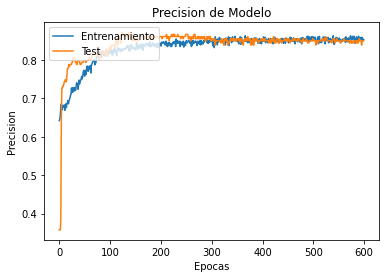

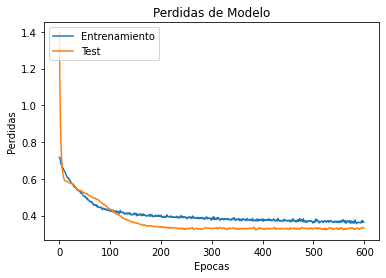

In [6]:
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, Reshape, PReLU,LeakyReLU,BatchNormalization,Activation
from tensorflow.keras.models import Model
import numpy as np
import tensorflow.keras
import tensorflow.keras.layers as layers
import tensorflow.keras.backend as K
import math
from tensorflow.keras.models import load_model,Model
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf


traindata = pd.read_csv('/train.csv')

testdata = pd.read_csv('/test.csv')

def process_data(datos):
    xt = datos[['Pclass','Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
    xt = xt.fillna(xt.mean())

    xt.loc[:,'Sex'] = xt['Sex'].replace(['female','male'],[0,1]).values
    xt.loc[:,'Pclass'] = xt.loc[:,'Pclass'] - 1

    return xt

xt = process_data(traindata)

xtest = process_data(testdata)

yt = traindata["Survived"]
ytonehot = tf.keras.utils.to_categorical(yt, num_classes=2)
print(ytonehot)

arraytrainx=np.array(xt)
arraytrainy=np.array(yt)


Entradas = Input(shape=(6,))
x=Dense(200)(Entradas)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.05)(x)
#x=Dropout(0.15)(x)
x=Dense(50)(x)
x=BatchNormalization()(x)
x=LeakyReLU(alpha=0.05)(x)
#x=Dropout(0.1)(x)
x=Dense(1)(x)
x = Activation('sigmoid')(x)

modelo = Model(inputs=Entradas, outputs=x)

Guardado = tensorflow.keras.callbacks.ModelCheckpoint('titanic.h5', monitor='val_acc', verbose=0, save_best_only=True,save_weights_only=False, mode='auto', period=1)

Adam = tensorflow.keras.optimizers.Adam(lr=0.0001,beta_1=0.9,beta_2=0.9)

modelo.compile(optimizer=Adam,loss='binary_crossentropy',metrics=['accuracy'])
history=modelo.fit(arraytrainx,arraytrainy ,epochs=600, batch_size=200,validation_split=0.2,callbacks=[Guardado],verbose=0)

plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precision de Modelo')
plt.ylabel('Precision')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')


plt.figure(2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Perdidas de Modelo')
plt.ylabel('Perdidas')
plt.xlabel('Epocas')
plt.legend(['Entrenamiento', 'Test'], loc='upper left')
plt.show()
